In [2]:
# Setup and imports
import math
import primefac
import random
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Asymmetric cryptography

So we have an infinite issue: we need to send a secret message using an insecure channel, so we encrypt it with a symmetric key and we are able to safely send it. But, now we have to send
the key using an insecure channel. We could encrypt it using another key, and we have the basis of an infinite loop. This is called the **key distribution problem**.

So, how do we get out of this loop? Enters asymmetric cryptography!

The whole idea around these family of algorithms is taking a problem that is REALLY hard to solve but, if you have the solution, it is very simple to CHECK. 
You normally have two keys, let's call them A and B. Whatever you encrypt using key A can only be decrypted using key B, and the other way around: if you encrypt
with B the message can only be decrypted using A.

![asymmetric cryptography](img/cryptography-asymmetric.png)

## Solving the key distribution problem

How does this help us with the key distribution problem? How it works is like this, we can generate key pairs as the ones me mentioned before: A and B. By convention
we are going to call one of those the *public key* and the other one, the *private key*. In general it doesn't matter which is which, altough some algorithms
have a certain preference.

Now, the *public key* we can distribute to everybody, while we guard the *private key* as securely as possible. This way, anybody with our public key is able 
to send us an encrypted message that only we can decrypt using our private key. Something to ponder about, what do we get if we encrypt a message using our 
private key?

![asymmetric keys usage](img/cryptography-asymmetric-key-pair.png)

Looks almost magical, right? Let's dive deeper into how it works.

## Hard problems are useful!

RSA is one of the most widely used algorithm for asymmetric encryptions. It rellies on a (currently) hard problem for computers: integer factorization. 
Given a number the goal is to determine the prime numbers that compose it. Determining the prime factors require a kind of brute force approach where you
divide the number with each known prime number up until $ \sqrt(n) $. If the number is large enough this could take a very long time. But, if you know
the prime factors, verifying this is quite trivial: multiply the prime factors and see if they give the original number.

In [3]:
def get_prime_factors(number):
    x = number
    factors = []
    for prime in primefac.primegen(limit=number/2):
        while x % prime == 0:
            factors.append(prime)
            x = x // prime
        
        if math.pow(prime, 2) > number:
            factors.append(x)
            break
        
        if x == 1:
            break
    
    if len(factors) == 0:
        factors = [number,]
    
    return factors

# Prime factors of this number?
n = 701111
print(f"Factors of {n}: {get_prime_factors(n)}")
        

Factors of 701111: [773, 907]


Once you know the factors it becomes almost trivial to check. But let's see how the problem get's harder with bigger numbers:

In [4]:
# Generate a random number with n_digits amount of digits
def generate_number(n_digits:int):
    digits = [i for i in range(10)]
    sample = random.choices(digits, k=n_digits)
    sample_sum = sum([digit*math.pow(10, power) for power, digit in enumerate(sample)])
    return(int(sample_sum))

# Get prime factors
total_numbers = 19 
times = np.zeros((total_numbers,))
max_time = 2

random.seed(142)
for n in range(total_numbers):
    if n != 0:
        number = generate_number(n_digits=n)
        factors = [f for f in get_prime_factors(number)]
        print(f'Number: {number} - factors: {factors}')
    times[n] = time.time()
    
# Calculate time diferences
a = total_numbers-1
b = total_numbers-2
while b >= 0:
    times[a] = round(times[a] - times[b], 2)
    a -= 1
    b -= 1
times[0] = 0.0

Number: 5 - factors: [5]
Number: 46 - factors: [2, 23]
Number: 834 - factors: [2, 3, 139]
Number: 5102 - factors: [2, 2551]
Number: 2058 - factors: [2, 3, 7, 7, 7]
Number: 884933 - factors: [7, 167, 757]
Number: 2740911 - factors: [3, 913637]
Number: 322887 - factors: [3, 43, 2503]
Number: 601303712 - factors: [2, 2, 2, 2, 2, 47, 173, 2311]
Number: 2629976122 - factors: [2, 137, 463, 20731]
Number: 68800753941 - factors: [3, 17, 1349034391]
Number: 70408989788 - factors: [2, 2, 17602247447]
Number: 4573879950077 - factors: [149, 30697180873]
Number: 24356229724306 - factors: [2, 547, 18251, 1219849]
Number: 532908135442707 - factors: [3, 71, 4871, 513635009]
Number: 3701959915427273 - factors: [47, 691, 310711, 366859]
Number: 32442530699363512 - factors: [2, 2, 2, 7, 13, 44563915795829]
Number: 725914248344291456 - factors: [2, 2, 2, 2, 2, 2, 2, 337, 2027, 8302171523]


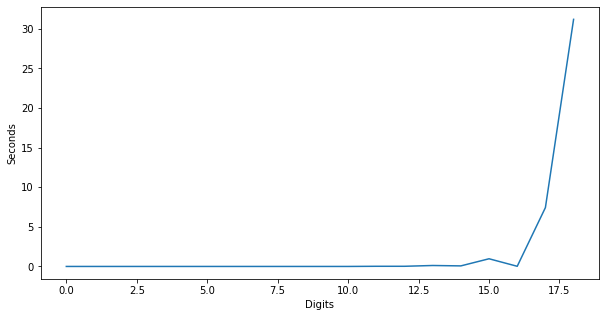

In [5]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(total_numbers), y=times)
plt.xlabel("Digits")
plt.ylabel("Seconds")
plt.show()

By increasing the number that we want to factorize we can see that the time rises up exponentially. Of course, there are more efficient means of
getting the prime factors of a number. Nonetheless, the time grows linearly with the number, which means it grows exponentially to the number of digits.
RSA rellies on this fact and takes VERY big numbers that have two prime factors. How big you ask? Well, a standard 2048-bit RSA uses keys as long
as 617 digits long! 

In [6]:
very_big_number = 2**2048
digits = len(str(very_big_number))

print(f'Our bit {digits} digits number is: {very_big_number}')

Our bit 617 digits number is: 32317006071311007300714876688669951960444102669715484032130345427524655138867890893197201411522913463688717960921898019494119559150490921095088152386448283120630877367300996091750197750389652106796057638384067568276792218642619756161838094338476170470581645852036305042887575891541065808607552399123930385521914333389668342420684974786564569494856176035326322058077805659331026192708460314150258592864177116725943603718461857357598351152301645904403697613233287231227125684710820209725157101726931323469678542580656697935045997268352998638215525166389437335543602135433229604645318478604952148193555853611059596230656


---
Factorizing something that big can bring any computer to a grinding halt. The trick to this algorithm is starting with the prime numbers, and multiplying them together to form this large number.
There are many ways of generating big prime numbers, though they are non-deterministic. This means that these algorithms generate primes up to an arbitrary confidence margin. One good algorithm
for this is [The Rabin-Miller Primality Test](http://home.sandiego.edu/~dhoffoss/teaching/cryptography/10-Rabin-Miller.pdf). You generate a random number and check if it is prime, if it is not
you generate another number and so on, until you get two prime numbers.  With these RSA derives a public and a private key that later can be used for encrypting communications.

Now, the actual math of how RSA works is mathematically heavy, so it is outside the scope of this tutorial. If you'd like to learn more about it this is a
[nice resource](https://www.comparitech.com/blog/information-security/rsa-encryption/). Integer factorization is not the only hard problem that is used for asymmetric encryption, but is one
of the most widely studied.

Another important aspect is that encrypting and decrypting using asymmetric algorithms is very inefficient, while symmetric algorithms are very efficient but suffer from the key-distribution problem.
So, we combine the best of both worls! We use the asymmetric algorithm to exchange a symmetric key, which is later used for the rest of the communication.

![Asymmetric and symmetric](img/cryptography-asymmetric-and-symmetric.png)


## What about encrypting using the private key?

Now, let's analyze a question that we left unanswered before. What do we get if we encrypt a message using our private key? The obvious answer is:
now everybody can read it! And yes, that is what happens. But it also gives us a subtle but very useful side effect. If somebody can decrypt a message
using my public key then it means that I used my private key to encrypt it (duh!). If I'm safekeeping my private key then the second thing
about this exchange is that the message could only have come from me. With this we have the basics of digital signature, a way of proving that
a message could only have been originated from somebody in particular.

# Can we safely communicate now?

We've seen how to overcome the confidentiality issue: how to send a secret message to another person through an unsecured channel. Nonetheless
some issues remain unsolved. If you recall from our original diagram, there are other attacks that a 3rd person could use.
For example:
- If Alice sends a message to Bob using an encrypted channel, how can Bob be certain that the message wasn't modified in transit?
- If Bob sends his public key to Alice, how can Alice be certain that it actually came from Bob? 
- How can Alice prove that she actually sent or didn't send a message to Bob?

![Cryptography issues](img/cryptography-issues-solved-partial.png)

With cryptography we can solve each of these issues, but we'll need to introduce some new concepts. So, starting with the issue
of a message being modified in transit or, *verifying the integrity of a message* we'll step into the concepts of a [hash](3-Cryptographic-hash.ipynb).